# Start

In [1]:
# imports
from sklearn.dummy import DummyClassifier
from sklearn.pipeline import Pipeline
import tensorflow as tf
from scikeras.wrappers import KerasClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense


In [2]:

# Load MNIST dataset
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

# Scale the images
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0

# Reshape the data
X_train_full = X_train_full.reshape((-1, 28, 28, 1))  # The model expects 3D images
X_test = X_test.reshape((-1, 28, 28, 1))

# Split the full training set into a validation set and a (smaller) training set
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.1, random_state=42)

# Set the number of classes (for MNIST, it's 10)
NUM_CLASSES = 10

# Now you can run your code with this dataset.

# Mapping

In [3]:
class LabelMapper(BaseEstimator, TransformerMixin):
    def __init__(self, pandas_series=True):
        self.pandas_series = pandas_series

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        if self.pandas_series:
            return X.map(self.map_labels)
        else:
            return np.array([self.map_labels(x) for x in X])

    @staticmethod
    def map_labels(original_label):
        if original_label in [0, 4, 5, 6]:
            return 0  # scooter
        elif original_label == 1:
            return 1  # not a scooter
        elif original_label in [2, 3]:
            return 2  # picture not clear
        else:
            return None  # handle cases outside your defined labels, if any


In [4]:
y_train_mapped = y_train
y_val_mapped = y_val
y_test_mapped = y_test

# Modeling

## Dummy Classifier

In [5]:

# Create a pipeline
dummy_pipeline = Pipeline([
    ('classifier', DummyClassifier(strategy='most_frequent')),  # Always predict the most frequent class
])

# Train the dummy classifier
dummy_pipeline.fit(X_train, y_train_mapped)

# Evaluate the dummy classifier
dummy_score = dummy_pipeline.score(X_val, y_val_mapped)
print(f"Dummy classifier accuracy: {dummy_score}")


Dummy classifier accuracy: 0.109


## simple NN

In [6]:
class SimpleNN(tf.keras.Model):
    def __init__(self, num_classes):
        super(SimpleNN, self).__init__()
        self.flatten = tf.keras.layers.Flatten()
        self.d1 = tf.keras.layers.Dense(128, activation='relu')
        self.d2 = tf.keras.layers.Dense(num_classes, activation='softmax')
        self.compile(optimizer='adam', 
                     loss='sparse_categorical_crossentropy', 
                     metrics=['accuracy'])

    def call(self, x):
        x = self.flatten(x)
        x = self.d1(x)
        return self.d2(x)

In [7]:
def create_simple_nn():
    model = Sequential([
        Flatten(input_shape=(28, 28, 1)),
        Dense(128, activation='relu'),
        Dense(NUM_CLASSES, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(



Simple Neural Network Metrics (Batch Size: 16):
Accuracy: 0.9768333333333333
Precision: 0.9770044419194267
Recall: 0.9768333333333333
F1-Score: 0.9768244270911439
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       624
           1       0.99      0.99      0.99       654
           2       0.97      0.98      0.97       572
           3       0.98      0.98      0.98       589
           4       0.96      0.99      0.97       580
           5       0.97      0.97      0.97       551
           6       0.99      0.99      0.99       580
           7       0.97      0.97      0.97       633
           8       0.96      0.98      0.97       585
           9       0.99      0.94      0.96       632

    accuracy                           0.98      6000
   macro avg       0.98      0.98      0.98      6000
weighted avg       0.98      0.98      0.98      6000



/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(



Simple Neural Network Metrics (Batch Size: 32):
Accuracy: 0.9743333333333334
Precision: 0.9744765096093059
Recall: 0.9743333333333334
F1-Score: 0.9743480164519269
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       624
           1       0.99      0.99      0.99       654
           2       0.96      0.97      0.96       572
           3       0.97      0.97      0.97       589
           4       0.99      0.98      0.98       580
           5       0.96      0.97      0.97       551
           6       0.97      0.99      0.98       580
           7       0.98      0.97      0.97       633
           8       0.98      0.96      0.97       585
           9       0.96      0.98      0.97       632

    accuracy                           0.97      6000
   macro avg       0.97      0.97      0.97      6000
weighted avg       0.97      0.97      0.97      6000



/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(



Simple Neural Network Metrics (Batch Size: 64):
Accuracy: 0.9763333333333334
Precision: 0.9764640309384934
Recall: 0.9763333333333334
F1-Score: 0.9763210592808007
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       624
           1       0.98      1.00      0.99       654
           2       0.96      0.98      0.97       572
           3       0.97      0.97      0.97       589
           4       0.97      0.99      0.98       580
           5       0.96      0.97      0.96       551
           6       0.99      0.99      0.99       580
           7       0.99      0.97      0.98       633
           8       0.97      0.96      0.97       585
           9       0.99      0.95      0.97       632

    accuracy                           0.98      6000
   macro avg       0.98      0.98      0.98      6000
weighted avg       0.98      0.98      0.98      6000



/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(



Simple Neural Network Metrics (Batch Size: 94):
Accuracy: 0.9721666666666666
Precision: 0.9723457622550756
Recall: 0.9721666666666666
F1-Score: 0.9721825629766351
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       624
           1       0.98      0.99      0.99       654
           2       0.96      0.97      0.96       572
           3       0.98      0.96      0.97       589
           4       0.96      0.98      0.97       580
           5       0.96      0.97      0.96       551
           6       0.99      0.96      0.98       580
           7       0.98      0.97      0.98       633
           8       0.96      0.96      0.96       585
           9       0.96      0.98      0.97       632

    accuracy                           0.97      6000
   macro avg       0.97      0.97      0.97      6000
weighted avg       0.97      0.97      0.97      6000



/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(



Simple Neural Network Metrics (Batch Size: 128):
Accuracy: 0.974
Precision: 0.9740951330176858
Recall: 0.974
F1-Score: 0.9740020400747706
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       624
           1       0.98      0.99      0.99       654
           2       0.97      0.97      0.97       572
           3       0.96      0.97      0.97       589
           4       0.98      0.96      0.97       580
           5       0.98      0.97      0.97       551
           6       0.98      0.99      0.99       580
           7       0.98      0.97      0.97       633
           8       0.96      0.96      0.96       585
           9       0.96      0.98      0.97       632

    accuracy                           0.97      6000
   macro avg       0.97      0.97      0.97      6000
weighted avg       0.97      0.97      0.97      6000



/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(



Simple Neural Network Metrics (Batch Size: 170):
Accuracy: 0.9711666666666666
Precision: 0.9714525536807932
Recall: 0.9711666666666666
F1-Score: 0.9711838110044079
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       624
           1       0.98      0.99      0.99       654
           2       0.94      0.98      0.96       572
           3       0.96      0.97      0.97       589
           4       0.97      0.97      0.97       580
           5       0.97      0.95      0.96       551
           6       0.98      0.99      0.98       580
           7       0.99      0.95      0.97       633
           8       0.97      0.97      0.97       585
           9       0.96      0.97      0.97       632

    accuracy                           0.97      6000
   macro avg       0.97      0.97      0.97      6000
weighted avg       0.97      0.97      0.97      6000



/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(



Simple Neural Network Metrics (Batch Size: 210):
Accuracy: 0.9686666666666667
Precision: 0.9689133335162
Recall: 0.9686666666666667
F1-Score: 0.968706781094055
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       624
           1       0.99      0.99      0.99       654
           2       0.95      0.97      0.96       572
           3       0.96      0.96      0.96       589
           4       0.98      0.96      0.97       580
           5       0.97      0.96      0.96       551
           6       0.98      0.98      0.98       580
           7       0.98      0.96      0.97       633
           8       0.94      0.97      0.96       585
           9       0.95      0.97      0.96       632

    accuracy                           0.97      6000
   macro avg       0.97      0.97      0.97      6000
weighted avg       0.97      0.97      0.97      6000



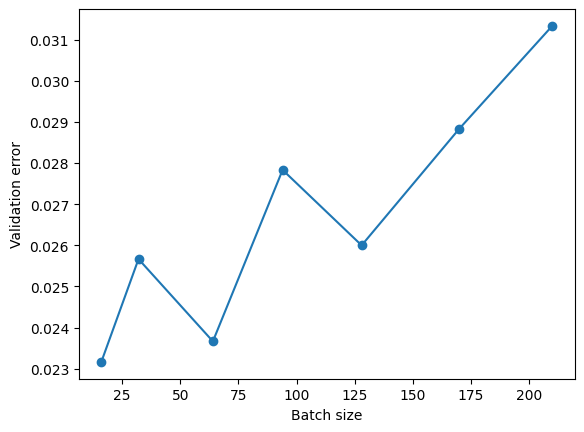

In [8]:
batch_sizes = [16, 32, 64, 94, 128, 170, 210]
val_errors = []

for batch_size in batch_sizes:
    # Redefine the pipeline with the new batch size
    nn_pipeline = Pipeline([
        ('classifier', KerasClassifier(build_fn=create_simple_nn, epochs=5, batch_size=batch_size, verbose=0)),
    ])

    # Train the NN classifier
    nn_pipeline.fit(X_train, y_train_mapped)
    y_val_pred_nn = nn_pipeline.predict(X_val)

    print(f"\nSimple Neural Network Metrics (Batch Size: {batch_size}):")
    print(f"Accuracy: {accuracy_score(y_val_mapped, y_val_pred_nn)}")
    print(f"Precision: {precision_score(y_val_mapped, y_val_pred_nn, average='weighted')}")
    print(f"Recall: {recall_score(y_val_mapped, y_val_pred_nn, average='weighted')}")
    print(f"F1-Score: {f1_score(y_val_mapped, y_val_pred_nn, average='weighted')}")
    print(classification_report(y_val_mapped, y_val_pred_nn))
    # Evaluate the NN classifier
    nn_score = nn_pipeline.score(X_val, y_val_mapped)
    val_errors.append(1 - nn_score)  # Error is 1 - accuracy

# Plot validation error vs batch size
plt.plot(batch_sizes, val_errors, marker='o')
plt.xlabel('Batch size')
plt.ylabel('Validation error')
plt.show()
